# 실습2 군집평가

## 필요한 라이브러리 준비

In [42]:
from __future__ import print_function
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from pandas import DataFrame
from scipy.stats import entropy
from math import log, e
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import math
import timeit

## 필요한 데이터 준비

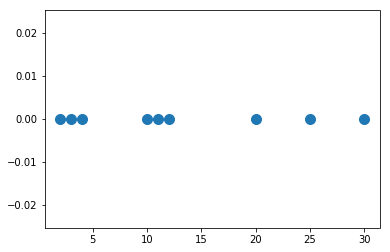

In [43]:
X = np.array([[2, 0], [3, 0], [4, 0],
              [10, 0], [11, 0], [12, 0],
              [20, 0], [25, 0], [30, 0]])
plt.scatter(X[:, 0], X[:, 1], s=100)
plt.show()

## 군집평가

### 모델 준비

In [44]:
model1 = KMeans(n_clusters=2, init=np.array([[3,0],[4,0]]), n_init=1,
               max_iter=1, random_state=1).fit(X)
c0, c1 = model1.cluster_centers_
c0, c1

(array([2.5, 0. ]), array([16.,  0.]))

### SSE 측정

In [45]:
model1.score(X)

-372.75

In [46]:
model1.labels_

array([0, 0, 0, 1, 1, 1, 1, 1, 1], dtype=int32)

In [47]:
X[model1.labels_]

array([[2, 0],
       [2, 0],
       [2, 0],
       [3, 0],
       [3, 0],
       [3, 0],
       [3, 0],
       [3, 0],
       [3, 0]])

In [48]:
X[model1.labels_,0]

array([2, 2, 2, 3, 3, 3, 3, 3, 3])

In [61]:
model1.labels_==0

array([ True,  True,  True, False, False, False, False, False, False])

In [62]:
X[model1.labels_==0]

array([[2, 0],
       [3, 0],
       [4, 0]])

In [50]:
np.mean(X[:, 0]),\
np.mean(X[model1.labels_ == 0, 0]),\
np.count_nonzero(X[model1.labels_,0]== 2),\
np.mean(X[model1.labels_==0,0])

(13.0, 3.0, 3, 3.0)

In [51]:
np.mean(X[:, 0]),\
np.mean(X[model1.labels_ == 1, 0]),\
np.count_nonzero(X[model1.labels_,0]== 3),\
np.mean(X[model1.labels_==1,0])

(13.0, 18.0, 6, 18.0)

### Cohesion 측정

In [52]:
def k_cohesion(model1, c0, c1):
    total_mean=np.mean(X[:,0])
    m1=np.mean(X[model1.labels_==0,0])
    m2=np.mean(X[model1.labels_==1,0])
    count1=np.count_nonzero(X[model1.labels_,0]== 2)
    count2=np.count_nonzero(X[model1.labels_,0]== 3)
    separation=count1*(total_mean-m1)**2+count2*(m2-total_mean)**2
    print(separation)

In [53]:
k_cohesion(model1,c0,c1)

450.0


In [54]:
list1=[]
list1.clear()
np.count_nonzero(X)

9

In [55]:
model1.labels_

array([0, 0, 0, 1, 1, 1, 1, 1, 1], dtype=int32)

In [56]:
def s_matrix(model1):
    for i in range(0,np.count_nonzero(X)):
        list1.append([])
        for j in range(0,np.count_nonzero(X)):
            if model1.labels_[i]==model1.labels_[j]: # 여기가 핵심
                list1[i].append(1)
            else :
                list1[i].append(0)

### 유사성 매트릭스 평가

In [57]:
s_matrix(model1)
list1

[[1, 1, 1, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 1, 1, 1, 1, 1, 1]]

In [58]:
def entropy(labels):
    """ Computes entropy of 0-1 vector. """
    n_labels = len(labels)

    if n_labels <= 1:
        return 0

    counts = np.bincount(labels)
    probs = counts[np.nonzero(counts)] / n_labels
    n_classes = len(probs)

    if n_classes <= 1:
        return 0
    return - np.sum(probs * np.log(probs)) / np.log(n_classes)

In [59]:
entropy(model1.labels_)

0.9182958340544894